<a href="https://www.kaggle.com/code/mohammedmohsen0404/proj17-credit-score-classification?scriptVersionId=192858811" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

---
**<center><h1>Credit score classification</h1></center>**
<center><h3>Learning ML, DL through 100 Practical Projects</h3></center>

---

This project focuses on developing a machine learning model to classify credit scores based on a person's credit-related information. The goal is to assist a global finance company in automating the segregation of individuals into credit score brackets, thereby reducing manual efforts and improving efficiency.

# **Import Libraries and Data**
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
!pip install category-encoders

In [3]:
from category_encoders import BinaryEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
! pip install kaggle
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d parisrohan/credit-score-classification
!unzip credit-score-classification.zip

cp: cannot stat '/content/drive/MyDrive/kaggle/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/parisrohan/credit-score-classification
License(s): CC0-1.0
  0%|                                               | 0.00/9.51M [00:00<?, ?B/s]
100%|███████████████████████████████████████| 9.51M/9.51M [00:00<00:00, 151MB/s]
Archive:  credit-score-classification.zip
  inflating: test.csv                
  inflating: train.csv               


In [5]:
df_train = pd.read_csv('train.csv').copy()
df_test = pd.read_csv('test.csv').copy()

# **Take a look at the data**
---

In [6]:
print(df_train.shape)
print(df_test.shape)

(100000, 28)
(50000, 27)


In [7]:
df_train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [8]:
df_train.tail()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,7,11.5,3.0,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,7,11.5,3.0,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,6,11.5,3.0,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,NaN,11.5,3.0,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard
99999,0x25fed,CUS_0x942c,August,Nicks,25,078-73-5990,Mechanic,39628.99_,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,6,11.5,3.0,Good,502.38,34.192463,31 Years and 10 Months,No,35.104023,167.1638651610451,!@9#%8,393.673696,Poor


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [10]:
df_train.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [11]:
df_train.select_dtypes(include='object').describe()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000,100000,100000,90015,100000,100000,100000,100000,100000,88592,92998,100000,100000,100000,90970,100000,95521,100000,98800,100000
unique,100000,12500,8,10139,1788,12501,16,18940,434,6260,749,4384,4,13178,404,3,91049,7,98792,3
top,0x25fb6,CUS_0x942c,January,Langep,38,#F%$D@*&8,_______,20867.67,3,Not Specified,19,_,Standard,1360.45,15 Years and 11 Months,Yes,__10000__,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard
freq,1,8,12500,44,2833,5572,7062,16,14386,1408,5327,2091,36479,24,446,52326,4305,25513,9,53174


In [12]:
df_train['Credit_Score'].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

# **Exploratory Data Analysis**
---

**Univariate Analysis**

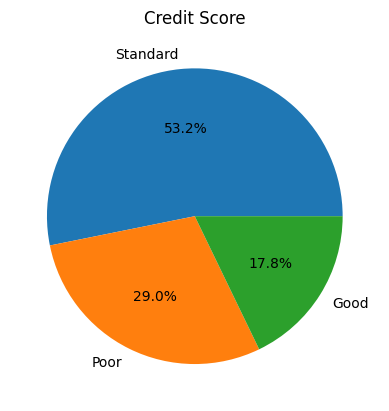

In [13]:
plt.pie(df_train['Credit_Score'].value_counts(),labels=df_train['Credit_Score'].value_counts().index, autopct='%1.1f%%')
plt.title('Credit Score')
plt.show()

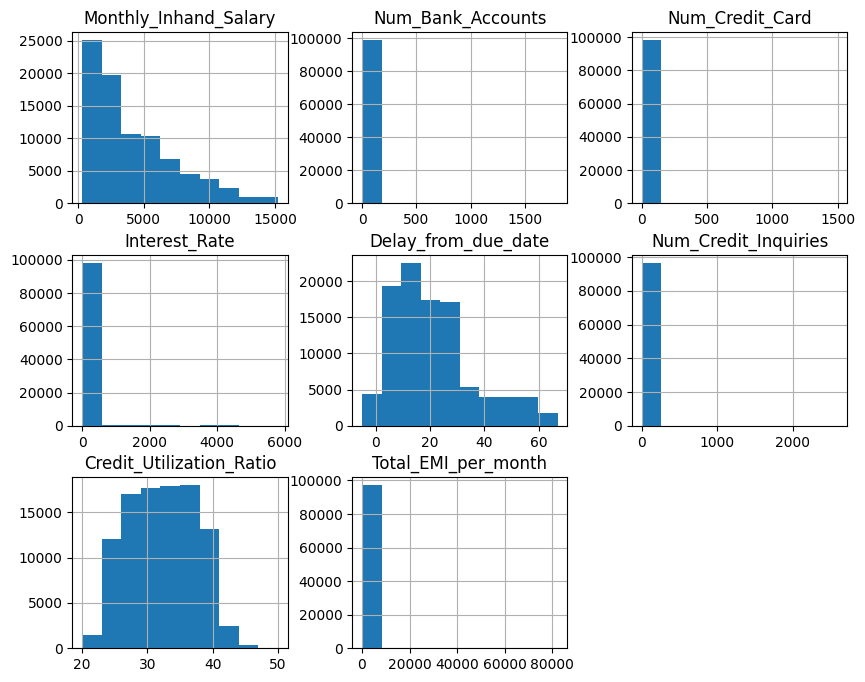

In [14]:
numerical_data = df_train.select_dtypes(include='number')

numerical_data.hist(figsize=(10,8))
plt.show()

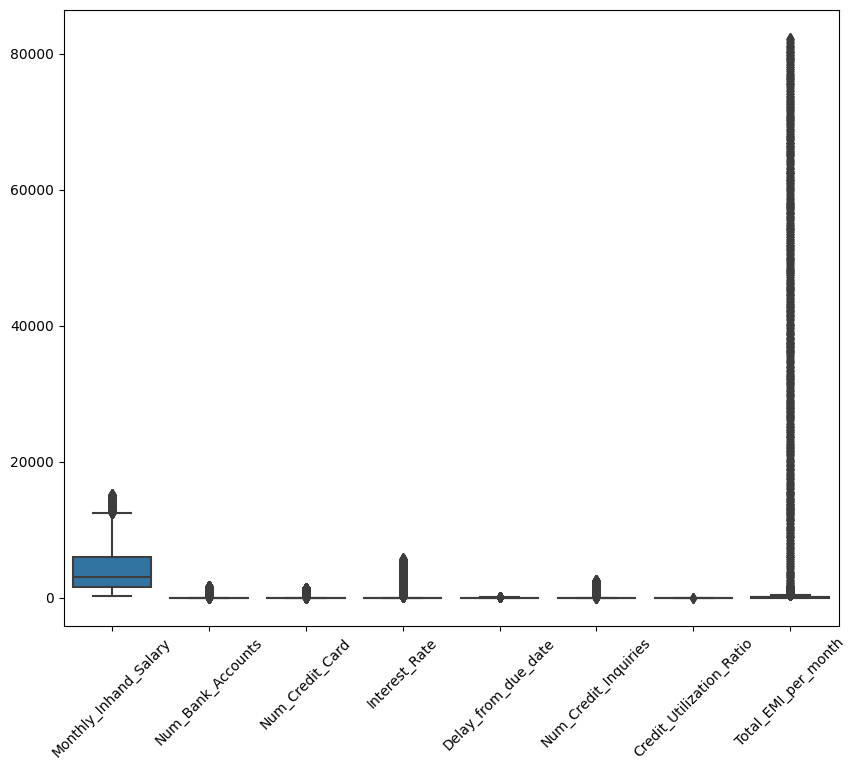

In [15]:
plt.figure(figsize=(10,8))
sns.boxplot(numerical_data)
plt.xticks(rotation = 45)
plt.show()

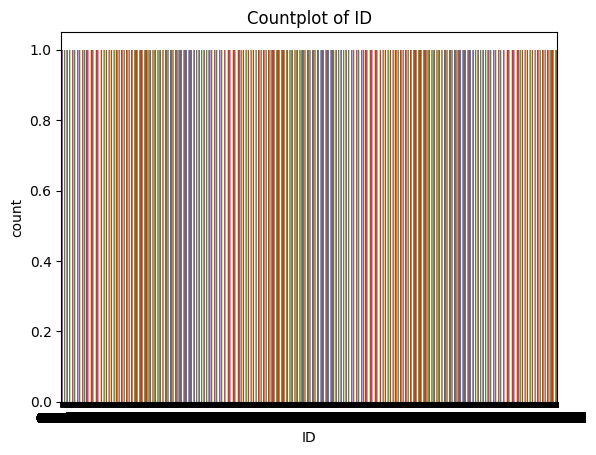

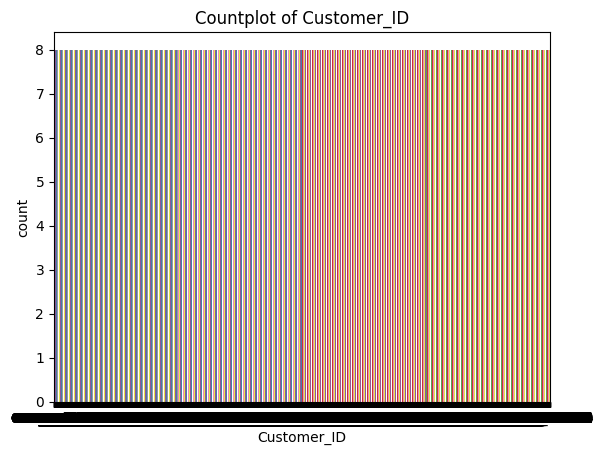

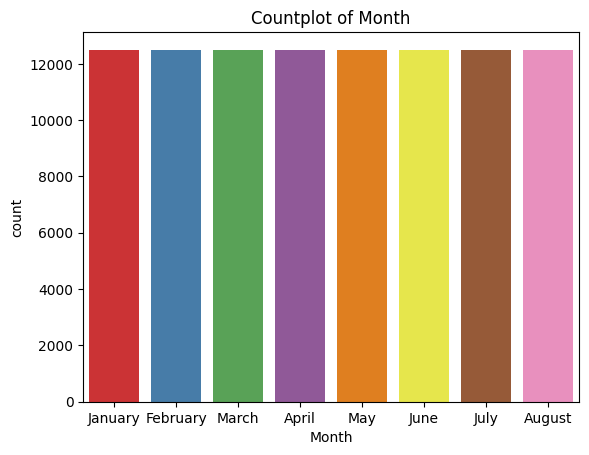

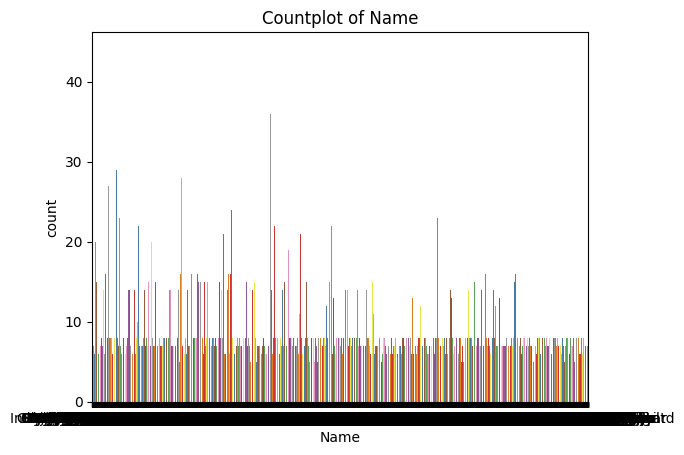

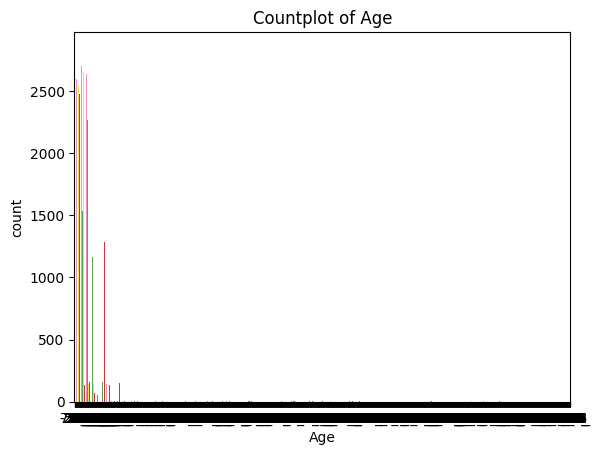

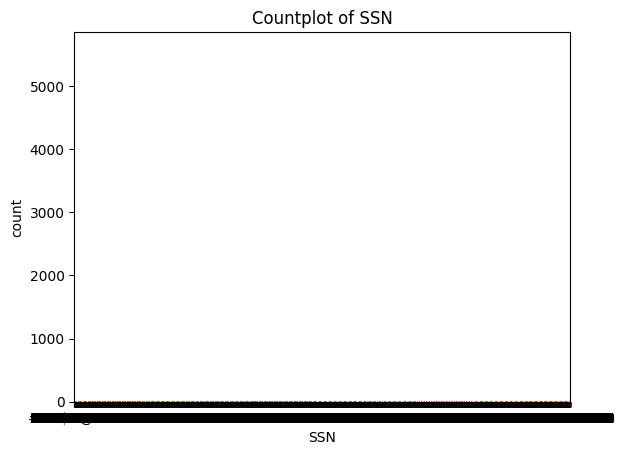

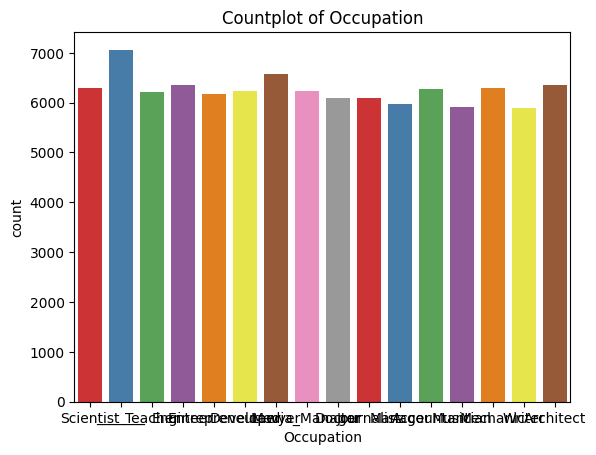

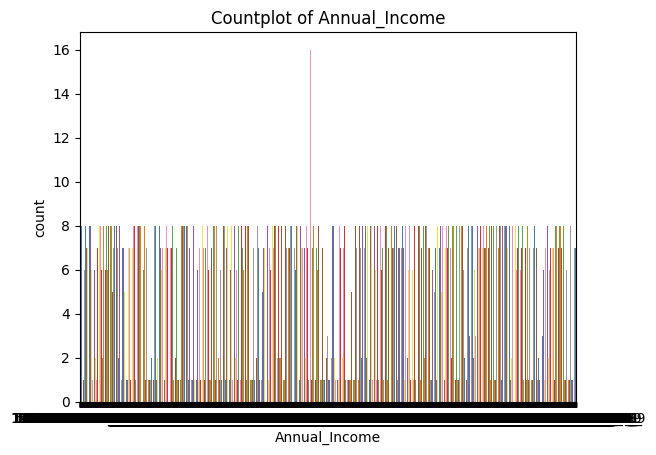

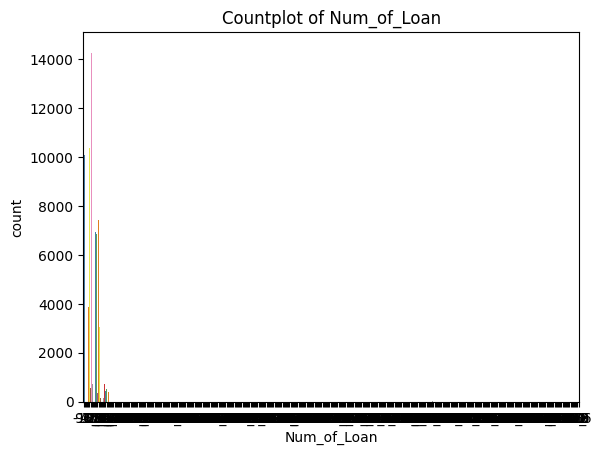

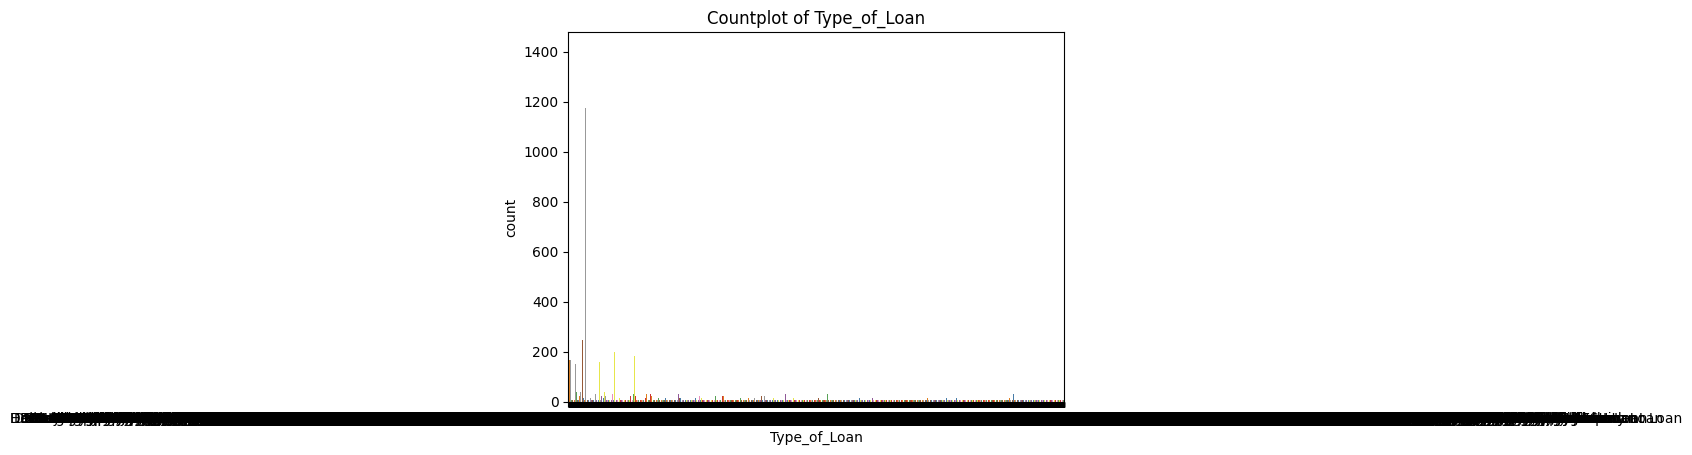

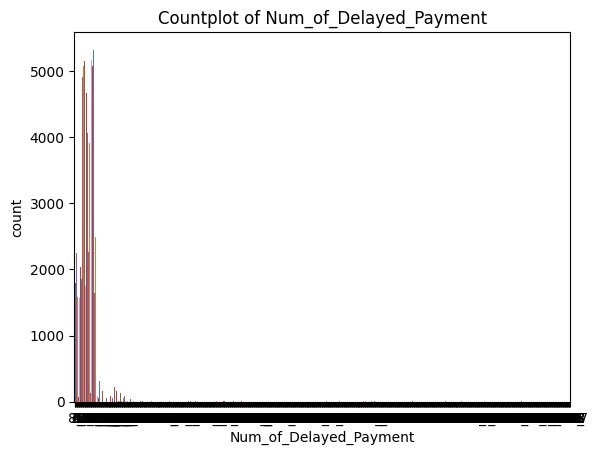

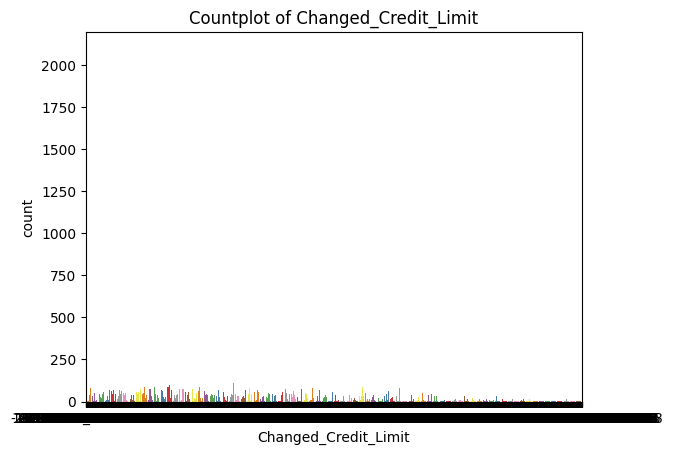

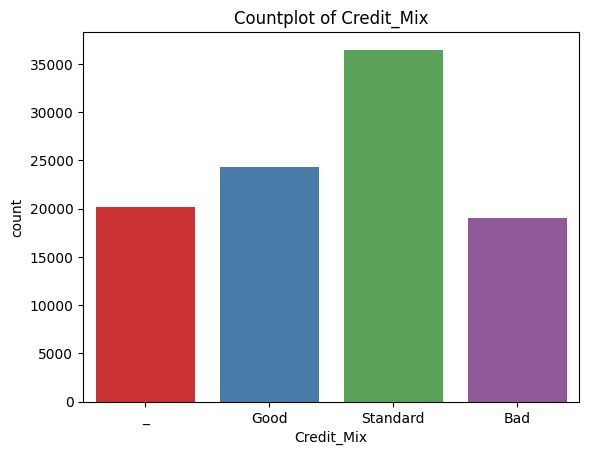

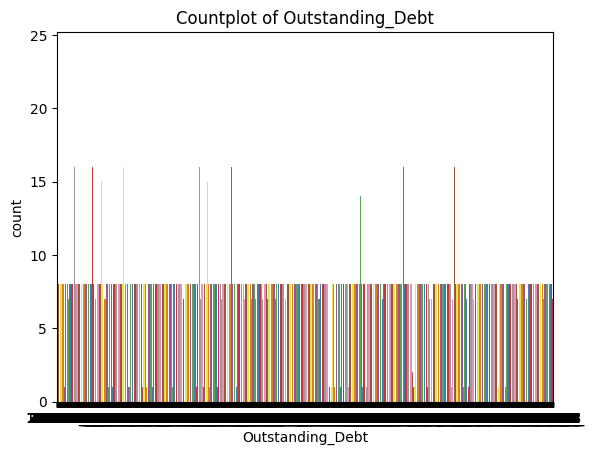

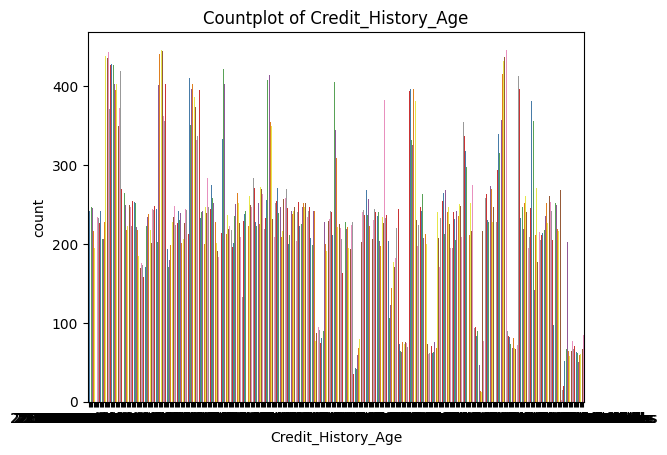

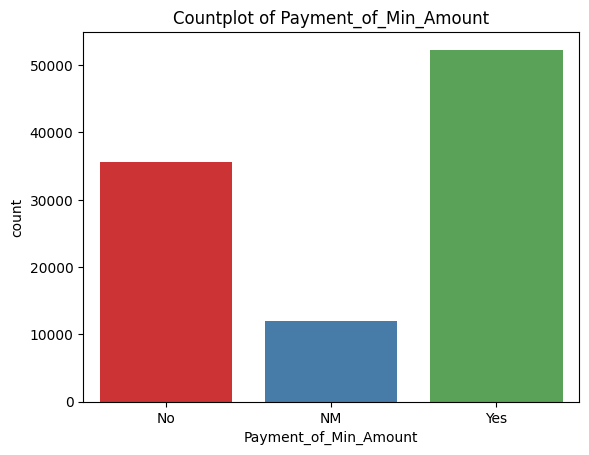

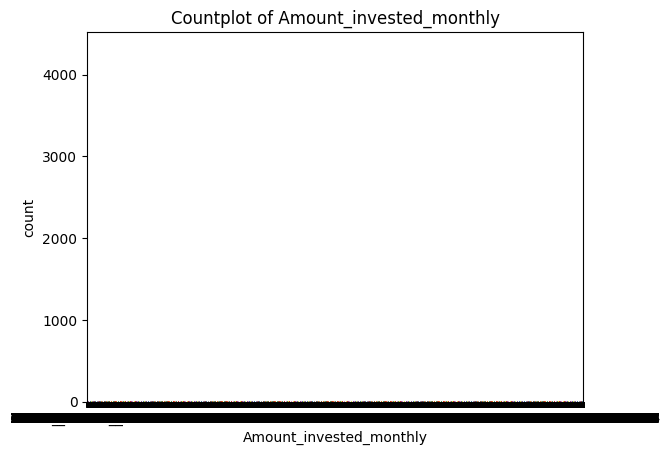

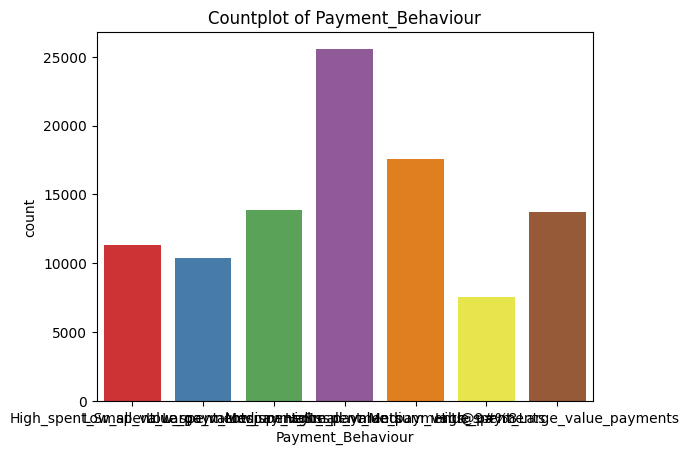

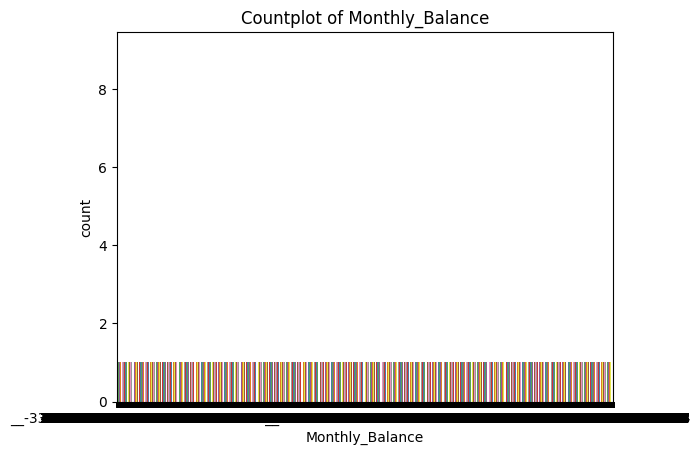

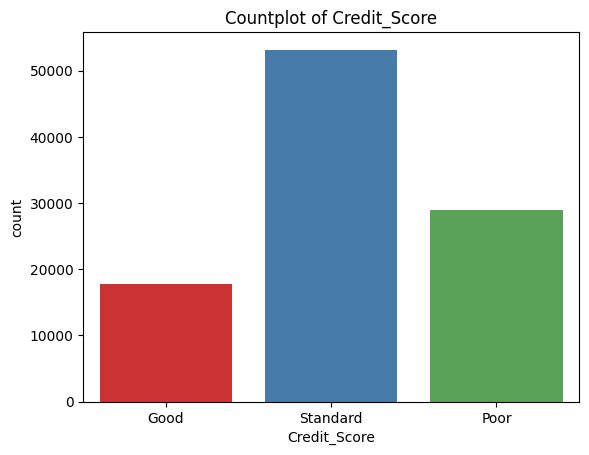

In [16]:
categorical_data = df_train.select_dtypes(exclude='number')
for column in categorical_data.columns:
    sns.countplot(data=categorical_data, x=column, palette="Set1")
    plt.title(f"Countplot of {column}")
    plt.show()

**Multivariate Analysis**

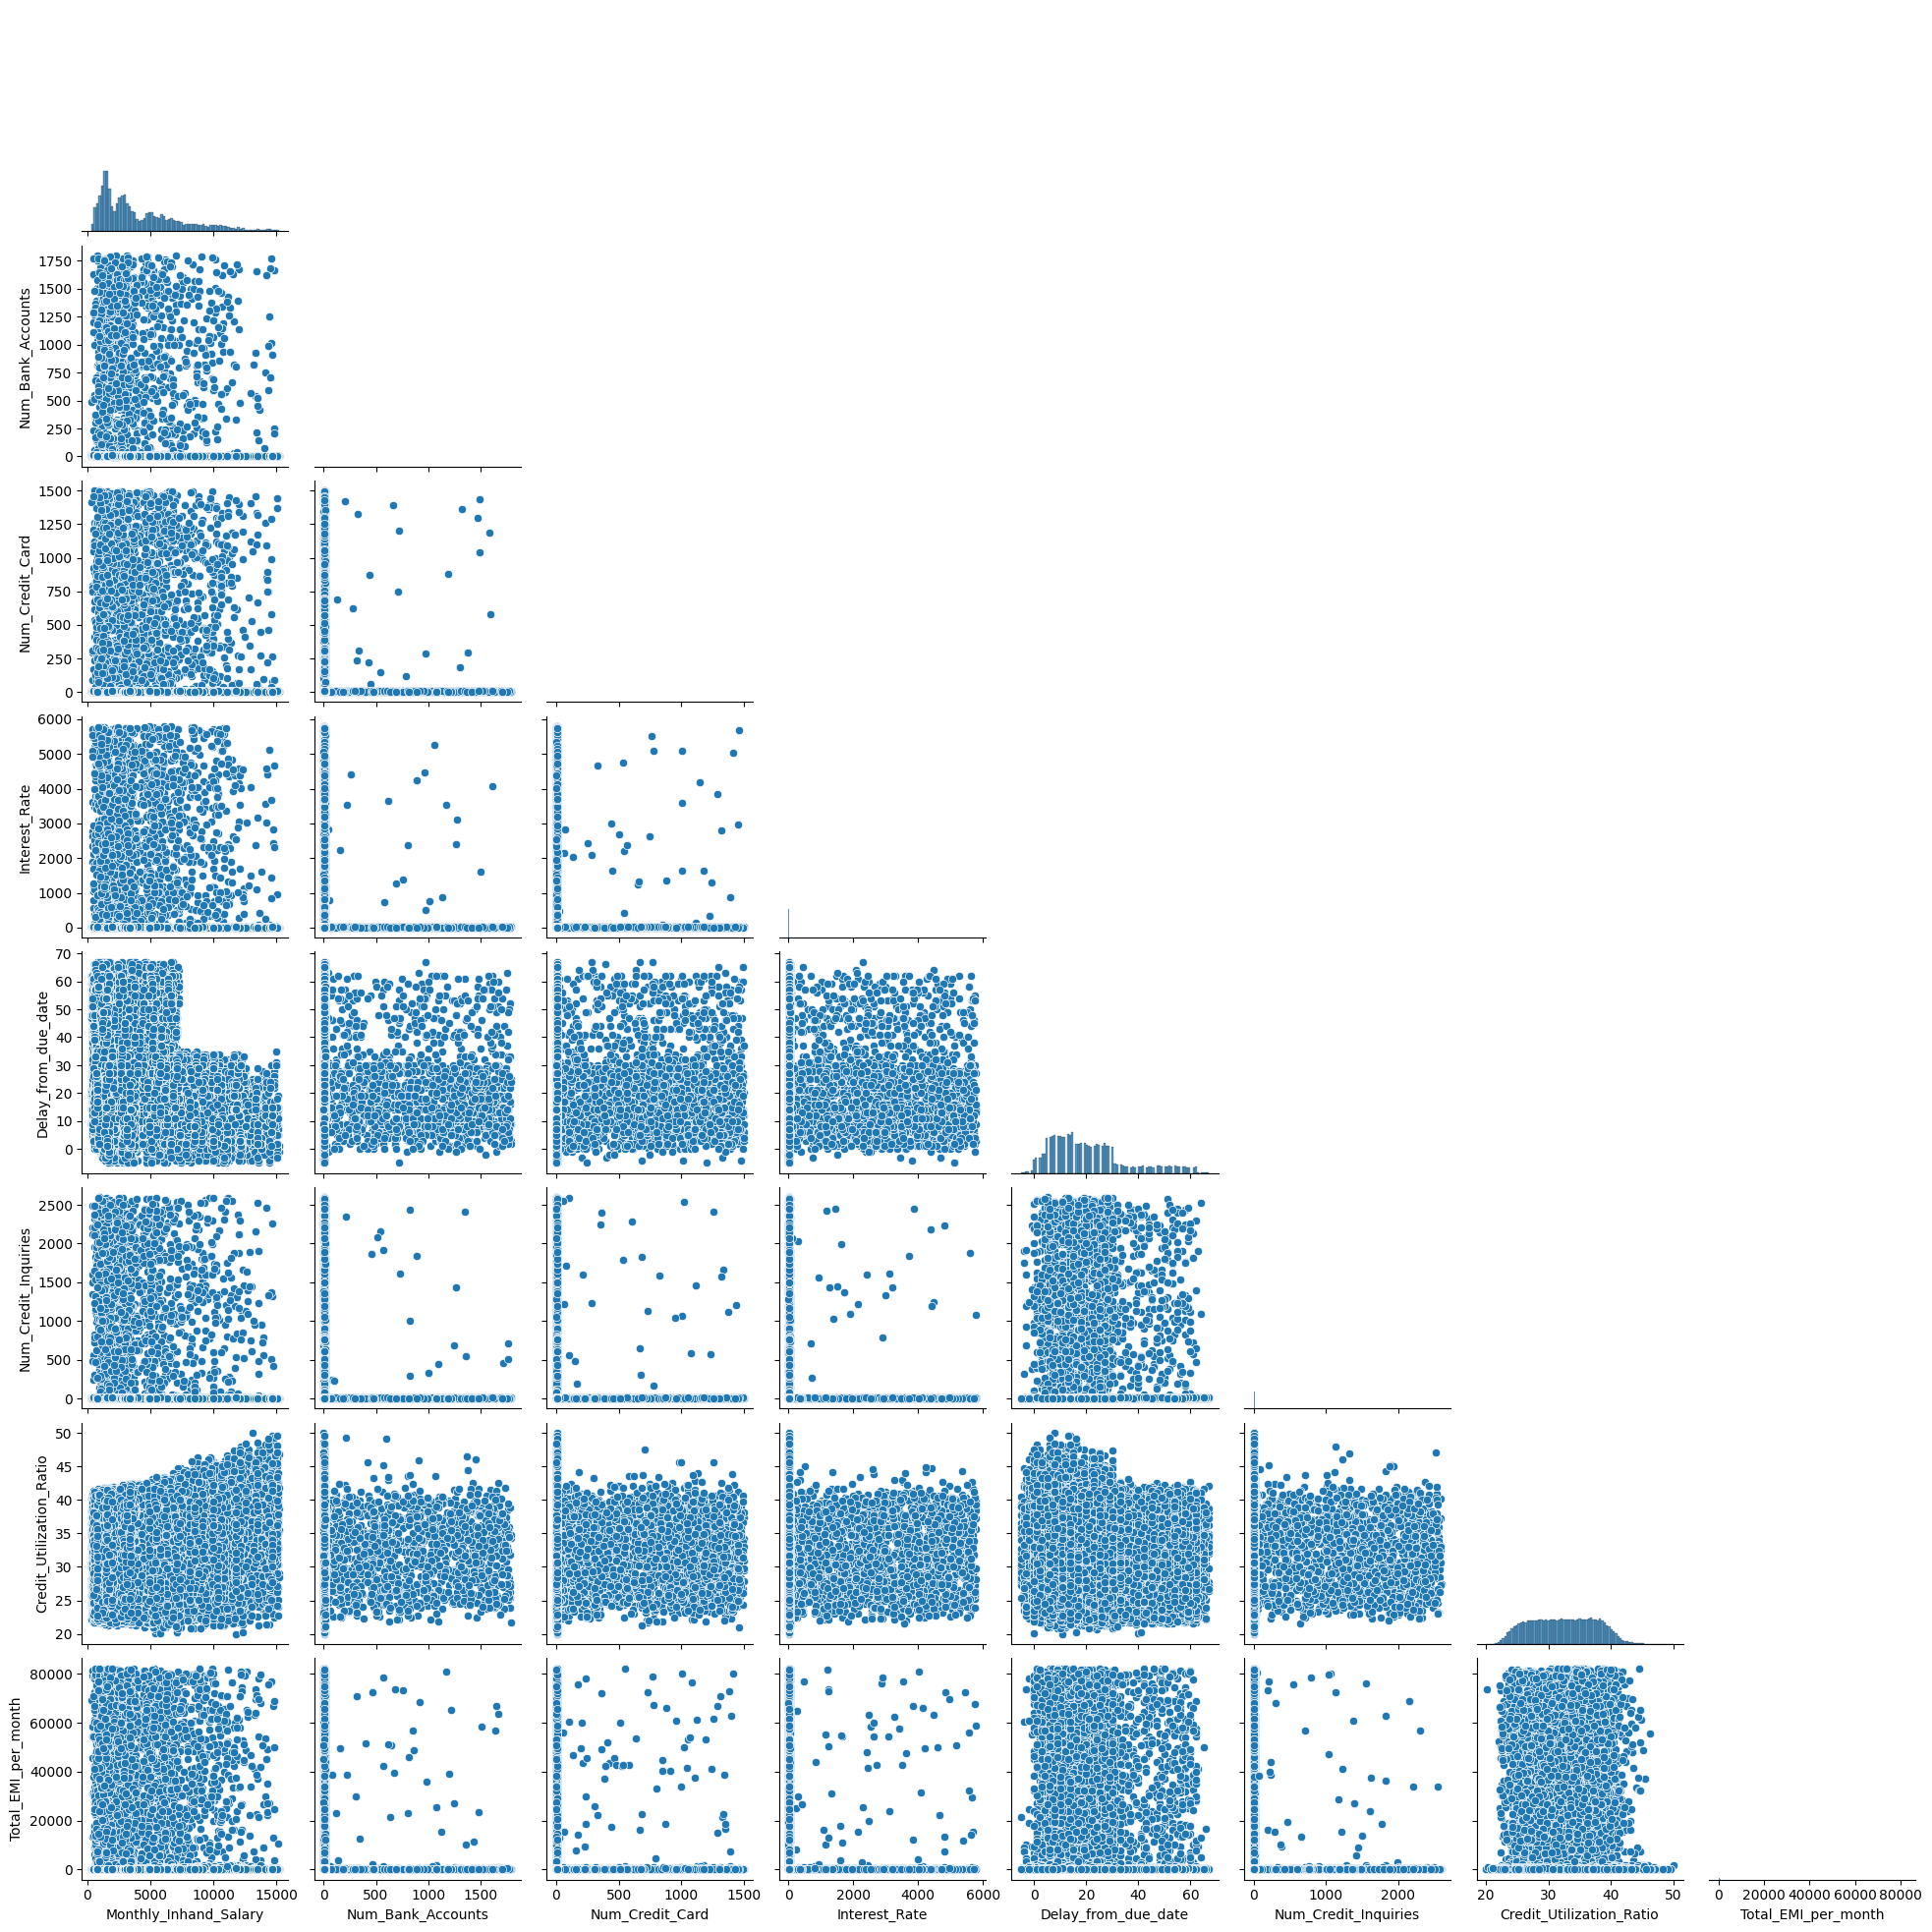

In [17]:
sns.pairplot(df_train, corner = True)
plt.show()

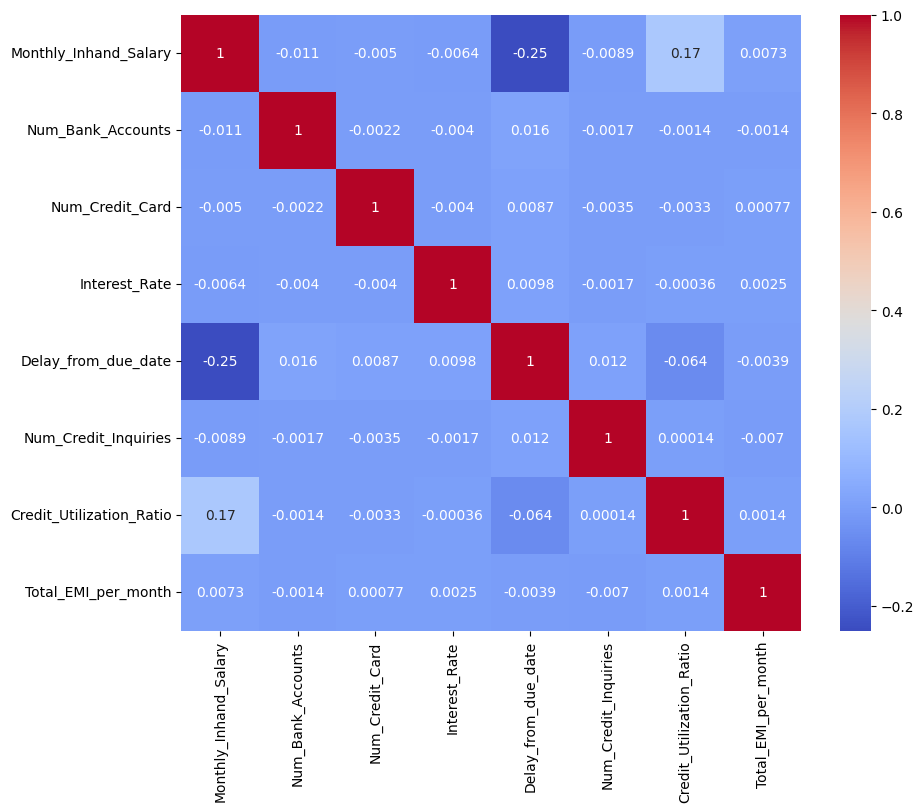

In [18]:
corr = df_train.select_dtypes(exclude=['object']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr,annot=True,cmap = 'coolwarm')
plt.show()

# **Data Cleaning**
---

**Drop Unnecessary Columns**

In [19]:
df_train.drop(['ID','Customer_ID','Name','SSN','Occupation','Payment_Behaviour','Type_of_Loan'],axis=1,inplace = True)
df_test.drop(['ID','Customer_ID','Name','SSN','Occupation','Payment_Behaviour','Type_of_Loan'],axis=1,inplace = True)

**Handling Duplicate Rows**

In [20]:
print(f"Number of duplicate rows in df_train: {df_train.duplicated().sum()}")
print(f"Number of duplicate rows in df_test: {df_test.duplicated().sum()}")


Number of duplicate rows in df_train: 0
Number of duplicate rows in df_test: 0


In [21]:
df_train = df_train.drop_duplicates()
df_test = df_test.drop_duplicates()

**Formatting**

In [22]:
df_train = df_train.replace(['', 'nan', '!@9#%8', '#F%$D@*&8','_','NM'], np.NaN)
df_test = df_test.replace(['', 'nan', '!@9#%8', '#F%$D@*&8','_','NM'], np.NaN)

In [23]:
def convert_rating(num):
    try:
        num_str = str(num)
        return float(num_str.replace('_', ''))
    except:
        return np.NaN

In [24]:
columns_to_convert = [
    'Amount_invested_monthly', 'Monthly_Balance', 'Num_of_Delayed_Payment',
    'Monthly_Inhand_Salary', 'Num_Credit_Inquiries', 'Age', 'Annual_Income',
    'Num_of_Loan', 'Changed_Credit_Limit', 'Outstanding_Debt'
]

for col in columns_to_convert:
    df_train[col] = df_train[col].apply(convert_rating)
    df_test[col] = df_test[col].apply(convert_rating)


In [25]:
import re

def convert_credit_history(age_str):
    try:
        years = int(re.search(r'(\d+) Years', age_str).group(1))
        months = int(re.search(r'(\d+) Months', age_str).group(1))
        return years * 12 + months
    except:
        return np.NaN

df_train['Credit_History_Age'] = df_train['Credit_History_Age'].apply(convert_credit_history)
df_test['Credit_History_Age'] = df_test['Credit_History_Age'].apply(convert_credit_history)


**Handling Missing Data**

In [26]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Credit_Mix,20195,0.20195
Monthly_Inhand_Salary,15002,0.15002
Payment_of_Min_Amount,12007,0.12007
Credit_History_Age,9030,0.09030
Num_of_Delayed_Payment,7002,0.07002
Amount_invested_monthly,4479,0.04479
Changed_Credit_Limit,2091,0.02091
Num_Credit_Inquiries,1965,0.01965
Monthly_Balance,1200,0.01200
Num_Bank_Accounts,0,0.00000


In [27]:
total = df_test.isnull().sum().sort_values(ascending=False)
percent = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Credit_Mix,9805,0.19610
Monthly_Inhand_Salary,7498,0.14996
Payment_of_Min_Amount,5993,0.11986
Credit_History_Age,4470,0.08940
Num_of_Delayed_Payment,3498,0.06996
Amount_invested_monthly,2271,0.04542
Changed_Credit_Limit,1059,0.02118
Num_Credit_Inquiries,1035,0.02070
Monthly_Balance,562,0.01124
Annual_Income,0,0.00000


In [28]:
def fill_missing_values(df, columns):
    for col in columns:
        if df[col].dtype == 'object':
            mode_value = df[col].mode()[0]
            df[col].fillna(mode_value, inplace=True)
        elif pd.api.types.is_numeric_dtype(df[col]):
            mean_value = df[col].mean()
            df[col].fillna(mean_value, inplace=True)
    return df

columns = df_test.columns.tolist()

df_train = fill_missing_values(df_train, columns)
df_test = fill_missing_values(df_test, columns)

In [29]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Month,0,0.0
Age,0,0.0
Annual_Income,0,0.0
Monthly_Inhand_Salary,0,0.0
Num_Bank_Accounts,0,0.0
Num_Credit_Card,0,0.0
Interest_Rate,0,0.0
Num_of_Loan,0,0.0
Delay_from_due_date,0,0.0
Num_of_Delayed_Payment,0,0.0


In [30]:
total = df_test.isnull().sum().sort_values(ascending=False)
percent = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Month,0,0.0
Age,0,0.0
Annual_Income,0,0.0
Monthly_Inhand_Salary,0,0.0
Num_Bank_Accounts,0,0.0
Num_Credit_Card,0,0.0
Interest_Rate,0,0.0
Num_of_Loan,0,0.0
Delay_from_due_date,0,0.0
Num_of_Delayed_Payment,0,0.0


In [31]:
total = df_train.isnull().sum().sum()
print('Total Null values =' ,total)

Total Null values = 0


# **Data Preprocessing**
---

**Encoding Categorical Variables**

In [32]:
df_train.select_dtypes(include='object').head()

,Month,Credit_Mix,Payment_of_Min_Amount,Credit_Score
0,January,Standard,No,Good
1,February,Good,No,Good
2,March,Good,No,Good
3,April,Good,No,Good
4,May,Good,No,Good


In [33]:
df_train['Payment_of_Min_Amount'] = df_train['Payment_of_Min_Amount'].apply(lambda x: 0 if x == 'No' else 1)
df_test['Payment_of_Min_Amount'] = df_test['Payment_of_Min_Amount'].apply(lambda x: 0 if x == 'No' else 1)

In [34]:
ordinal_mapping = {'Poor': 0, 'Standard': 1, 'Good': 2}
df_train['Credit_Score'] = df_train['Credit_Score'].map(ordinal_mapping)

In [35]:
ordinal_mapping = {'Standard': 0, 'Good': 1, 'Bad': 2}
df_train['Credit_Mix'] = df_train['Credit_Mix'].map(ordinal_mapping)
df_test['Credit_Mix'] = df_test['Credit_Mix'].map(ordinal_mapping)

In [36]:
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

df_train['Month'] = df_train['Month'].map(month_mapping)
df_test['Month'] = df_test['Month'].map(month_mapping)

In [37]:
df_train.head()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,1,23.0,19114.12,1824.843333,3,4,3,4.0,3,7.000000,11.270000,4.0,0,809.98,26.822620,265.000000,0,49.574949,80.415295,312.494089,2
1,2,23.0,19114.12,4194.170850,3,4,3,4.0,-1,30.923342,11.270000,4.0,1,809.98,31.944960,221.195405,0,49.574949,118.280222,284.629162,2
2,3,-500.0,19114.12,4194.170850,3,4,3,4.0,3,7.000000,10.389025,4.0,1,809.98,28.609352,267.000000,0,49.574949,81.699521,331.209863,2
3,4,23.0,19114.12,4194.170850,3,4,3,4.0,5,4.000000,6.270000,4.0,1,809.98,31.377862,268.000000,0,49.574949,199.458074,223.451310,2
4,5,23.0,19114.12,1824.843333,3,4,3,4.0,6,30.923342,11.270000,4.0,1,809.98,24.797347,269.000000,0,49.574949,41.420153,341.489231,2


**Dealing with Outliers**

In [38]:

Q1 = df_train.quantile(0.25)
Q3 = df_train.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_train[(df_train < lower_bound) | (df_train > upper_bound)]
print(outliers.count())

Month                          0
Age                         2781
Annual_Income               2783
Monthly_Inhand_Salary       4365
Num_Bank_Accounts           1315
Num_Credit_Card             2271
Interest_Rate               2034
Num_of_Loan                 4348
Delay_from_due_date         4002
Num_of_Delayed_Payment       736
Changed_Credit_Limit        1177
Num_Credit_Inquiries        3615
Credit_Mix                     0
Outstanding_Debt            5272
Credit_Utilization_Ratio       4
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month         6795
Amount_invested_monthly     8251
Monthly_Balance             8926
Credit_Score                   0
dtype: int64


In [39]:
def cap_age(value):
    if value < 10:
        return 10
    elif value > 120:
        return 120
    else:
        return value

df_train['Age'] = df_train['Age'].apply(cap_age)
df_test['Age'] = df_test['Age'].apply(cap_age)

In [40]:
from scipy import stats

for col in df_train.drop('Credit_Score',axis=1).columns:
  df_train[col] = df_train[col].apply(lambda x: x if x > 0 else 1e-6)
  df_train[col], _ = stats.boxcox(df_train[col])

for col in df_test.select_dtypes(include=['number']).columns:
  df_test[col] = df_test[col].apply(lambda x: x if x > 0 else 1e-6)
  df_test[col], _ = stats.boxcox(df_test[col])

In [41]:
#np.log1p(df_train.drop('Credit_Score',axis=1))
#np.log1p(df_test)

**Data splitting**

In [42]:
X = df_train.drop(['Credit_Score'], axis=1)
y = df_train['Credit_Score']
X_train, X_temp, y_train, y_temp = train_test_split(X,y,test_size=.1,random_state=44,stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_temp,y_temp,test_size=.5,random_state=44,stratify=y_temp)

**Data Normalization**

In [43]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

# **Modeling**
-----

In [44]:
from sklearn.metrics import classification_report , f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb

In [45]:
classifiers = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(n_estimators=500, bootstrap=True,random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('xgboost', xgb.XGBClassifier())
]

Logistic Regression:
Cross Val Score: 0.61
F1 Score: 0.61
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.47      0.53      1450
           1       0.64      0.74      0.69      2658
           2       0.53      0.49      0.51       892

    accuracy                           0.62      5000
   macro avg       0.60      0.57      0.58      5000
weighted avg       0.61      0.62      0.61      5000



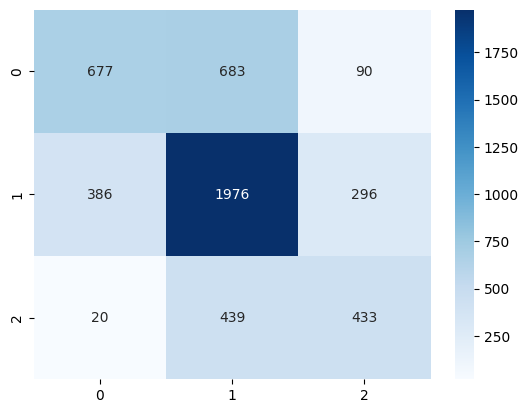

---------------------------------------------------
Support Vector Machine:
Cross Val Score: 0.69
F1 Score: 0.71
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.64      0.69      1450
           1       0.74      0.76      0.75      2658
           2       0.56      0.65      0.60       892

    accuracy                           0.70      5000
   macro avg       0.68      0.68      0.68      5000
weighted avg       0.71      0.70      0.71      5000



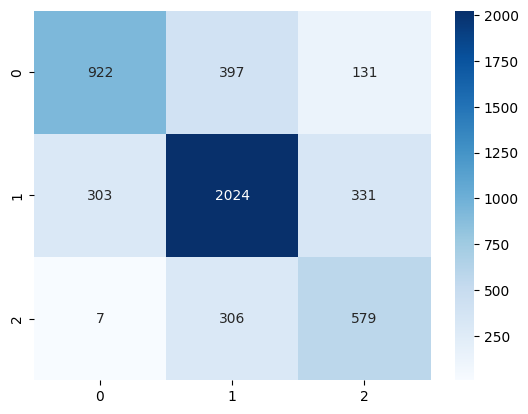

---------------------------------------------------
Decision Tree:
Cross Val Score: 0.69
F1 Score: 0.71
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.70      0.70      1450
           1       0.74      0.74      0.74      2658
           2       0.61      0.61      0.61       892

    accuracy                           0.71      5000
   macro avg       0.68      0.68      0.68      5000
weighted avg       0.71      0.71      0.71      5000



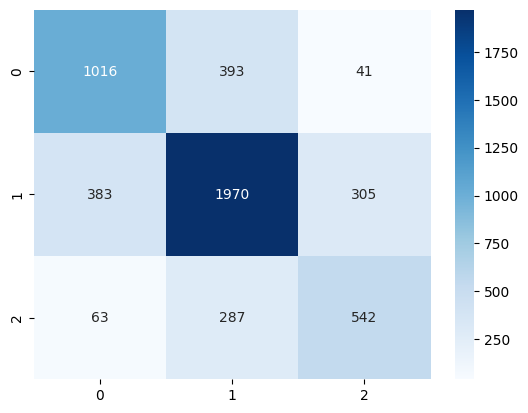

---------------------------------------------------
Random Forest:
Cross Val Score: 0.79
F1 Score: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1450
           1       0.83      0.82      0.83      2658
           2       0.73      0.74      0.74       892

    accuracy                           0.81      5000
   macro avg       0.79      0.80      0.79      5000
weighted avg       0.81      0.81      0.81      5000



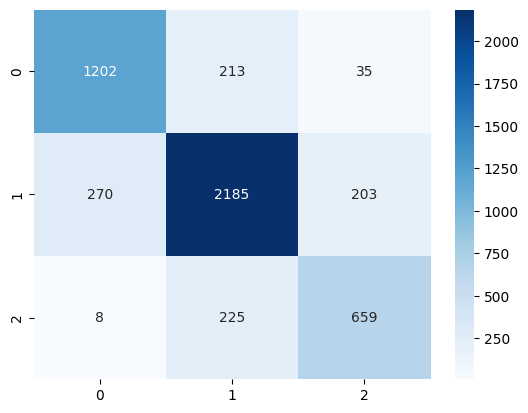

---------------------------------------------------
Gradient Boosting:
Cross Val Score: 0.70
F1 Score: 0.70
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.65      0.70      1450
           1       0.72      0.77      0.75      2658
           2       0.56      0.57      0.57       892

    accuracy                           0.70      5000
   macro avg       0.68      0.66      0.67      5000
weighted avg       0.70      0.70      0.70      5000



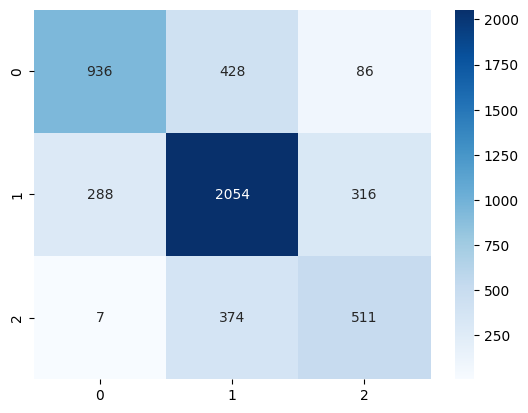

---------------------------------------------------
xgboost:
Cross Val Score: 0.75
F1 Score: 0.76
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.73      0.76      1450
           1       0.78      0.79      0.79      2658
           2       0.67      0.70      0.68       892

    accuracy                           0.76      5000
   macro avg       0.74      0.74      0.74      5000
weighted avg       0.76      0.76      0.76      5000



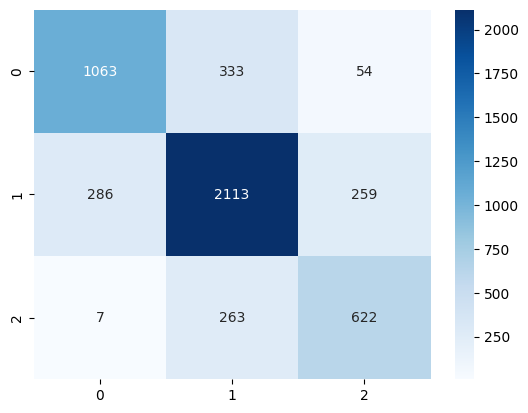

---------------------------------------------------


In [46]:
for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
    print(f'{clf_name}:')
    print(f"Cross Val Score: {cv_scores.mean():.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='Blues')
    plt.show()
    print('---------------------------------------------------')

# **DNN**
-----

In [47]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping , ReduceLROnPlateau
from tensorflow.keras.metrics import F1Score

2024-08-16 12:47:17.451580: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-16 12:47:17.451739: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-16 12:47:17.736425: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [48]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

In [49]:
ES = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
RL = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

In [50]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=[F1Score])

In [51]:
history = model.fit(X_train, y_train, epochs=150, batch_size=64, validation_data=(X_val, y_val), callbacks=[ES,RL])

Epoch 1/150
  45/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - f1_score: 0.4116 - loss: 0.9888

I0000 00:00:1723812462.968687     101 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - f1_score: 0.4509 - loss: 0.8017 - val_f1_score: 0.4575 - val_loss: 0.6980 - learning_rate: 0.0010
Epoch 2/150
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - f1_score: 0.4622 - loss: 0.7243 - val_f1_score: 0.4705 - val_loss: 0.6913 - learning_rate: 0.0010
Epoch 3/150
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - f1_score: 0.4649 - loss: 0.7160 - val_f1_score: 0.4705 - val_loss: 0.6839 - learning_rate: 0.0010
Epoch 4/150
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - f1_score: 0.4677 - loss: 0.7112 - val_f1_score: 0.4716 - val_loss: 0.6759 - learning_rate: 0.0010
Epoch 5/150
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - f1_score: 0.4677 - loss: 0.7062 - val_f1_score: 0.4719 - val_loss: 0.6774 - learning_rate: 0.0010
Epoch 6/150
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - f1_score: 0.4685 - loss: 0.7057 - val_f1_score: 0.4685 - val_loss: 0.6847 - learning_rate: 0.0010
Epoch 7/150
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - f1_score: 0.4654 - loss:

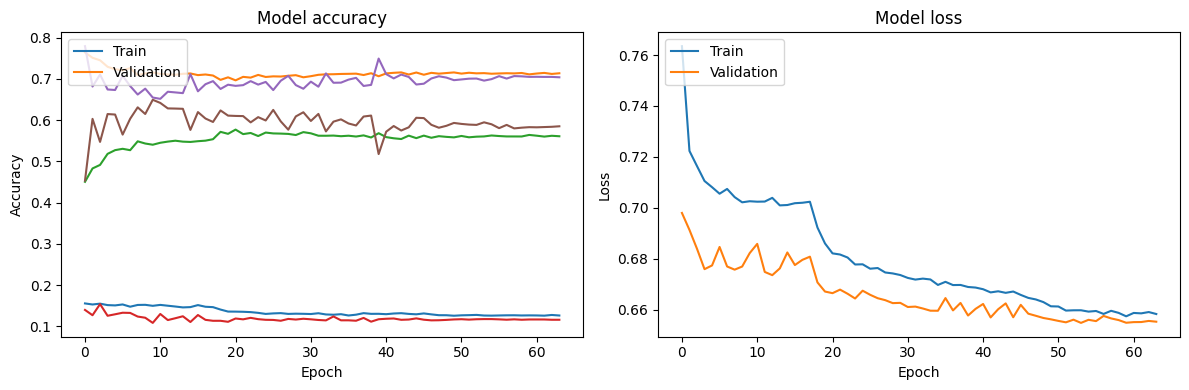

In [52]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [53]:
model.evaluate(X_test, y_test)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - f1_score: 0.4644 - loss: 0.6481


[0.6532981991767883,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.10518856, 0.70189315, 0.5931083 ], dtype=float32)>]